In [ ]:
# Decision Tree Regressor Implementation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#California House Pricing Dataset

from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [6]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target

In [10]:
df.shape

(20640, 9)

In [12]:
# Taking Sample Data
df=df.sample(frac=0.25)

In [14]:
df.shape

(5160, 9)

In [16]:
# Independent features

X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [18]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1151,1.5771,12.0,4.175904,1.014458,1861.0,4.484337,39.53,-121.56
13564,2.9667,42.0,5.144886,0.980114,856.0,2.431818,34.15,-117.29
17080,4.5568,38.0,4.452055,0.921233,608.0,2.082192,37.48,-122.19
3382,4.6635,35.0,5.193333,0.953333,371.0,2.473333,34.25,-118.27
15337,4.3762,11.0,6.086603,1.090671,8738.0,2.539378,33.19,-117.31


In [20]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [24]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [26]:
y_pred=regressor.predict(X_test)

In [28]:
y_pred

array([1.128, 0.875, 1.741, ..., 3.   , 4.051, 1.788])

In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [32]:
score

0.5180016096734217

In [34]:
# Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

In [36]:
#https://scikit-learn.org/stable/modules/model_evaluation.html

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [38]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [40]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'auto',
 'splitter': 'random'}

In [42]:
regressor=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [44]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [46]:
%matplotlib inline

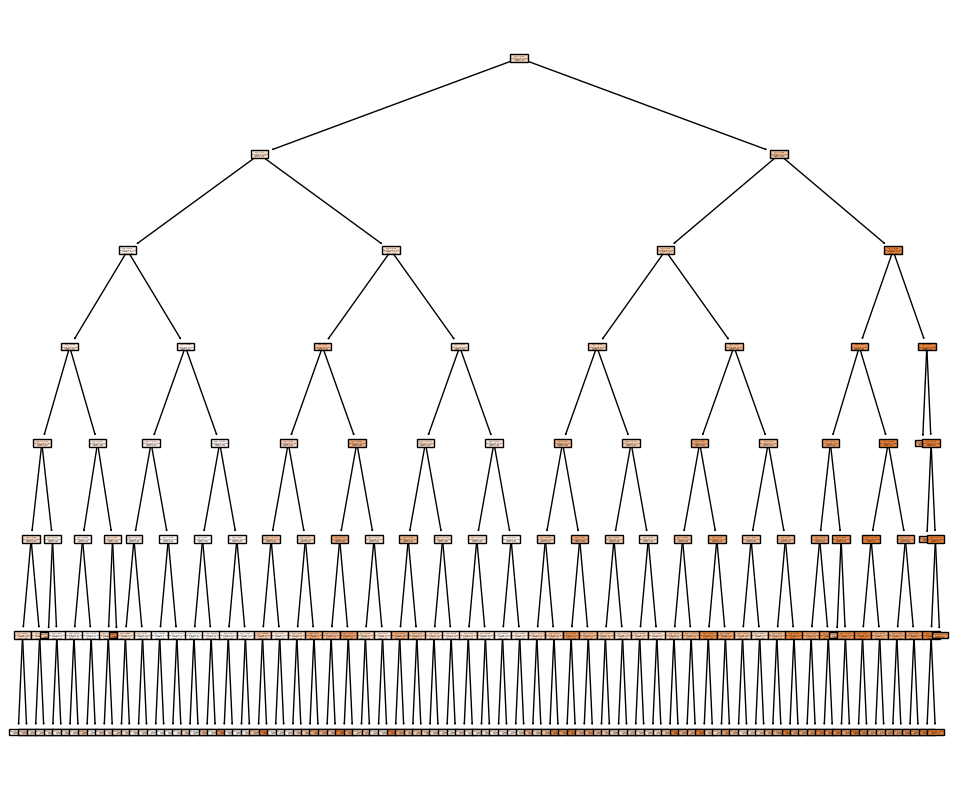

In [48]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [50]:
y_pred=regressorcv.predict(X_test)